In [10]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron(X, y, learning_rate=0.01, num_epochs=100):
  """
  Trains a single perceptron on the given data.

  Args:
      X: A 2D numpy array of training data (shape: number of samples, number of features)
      y: A 1D numpy array of labels (shape: number of samples)
      learning_rate: The learning rate for weight updates (default: 0.01)
      num_epochs: The number of epochs to train the perceptron (default: 100)

  Returns:
      w: The weights of the perceptron (shape: number of features + 1, where +1 is for bias)
  """

  # Add a bias term (w0) to the input data
  X = np.hstack((np.ones((X.shape[0], 1)), X))
  w = np.random.rand(X.shape[1])  # Initialize weights with random values

  for epoch in range(num_epochs):
    errors = 0
    for i, x_i in enumerate(X):
      y_predicted = np.dot(w, x_i)
      error = y[i] - np.sign(y_predicted)  # Update rule: subtract desired output from predicted
      errors += abs(error)
      w += learning_rate * error * x_i  # Update weights based on error

    if errors == 0:
      print(f"Converged after {epoch + 1} epochs.")
      break

  return w

def plot_decision_boundary(X, y, w):
  """
  Plots the decision boundary of the trained perceptron.
  """

  # Get the equation of the decision boundary: w0x0 + w1x1 + w2 = 0
  w0, w1, w2 = w
  x1 = np.linspace(-1, 1.5, 400)  # Range for x1
  x2 = -(w0 + w1 * x1) / w2  # Solve for x2

  # Plot the data points with different colors based on labels
  plt.scatter(X[:, 1], X[:, 2], c=y, cmap='viridis', edgecolors='k')

  # Plot the decision boundary line
  plt.plot(x1, x2, label='Decision Boundary', color='r')

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Single Perceptron Decision Boundary')
  plt.legend()
  plt.grid(True)
  plt.show()

# Sample linearly separable data
X = np.array([
    [0.3, 0.5],
    [0.1, 0.8],
    [0.7, 0.1],
    [0.9, 0.3],
    [-0.2, -0.3],
    [-0.4, -0.5],
    [-0.6, -0.1],
    [-0.8, 0.2],
])
y = np.array([1, 1, 1, 1, -1, -1, -1, -1])

# Train the perceptron
w = perceptron(X, y)

# Plot the decision boundary
# plot_decision_boundary(X, y, w)

#This program defines two functions:

#perceptron: Trains a single perceptron using the perceptron learning rule with a given learning rate and number of epochs.
#plot_decision_boundary: Plots the decision boundary of the trained perceptron on the data points.
#The program then creates some sample linearly separable data, trains the perceptron on it, and visualizes the decision boundary using matplotlib.

# Explanation:

# Data and Labels:

#X: A 2D NumPy array representing the training data, with each row representing a data sample (feature vector).
#y: A 1D NumPy array containing the labels (target values) for each data sample.
#Perceptron Training (perceptron function):

#Adds a bias term (w0) to the input data to account for a constant offset in the decision boundary.
#Initializes weights with random

Converged after 1 epochs.


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


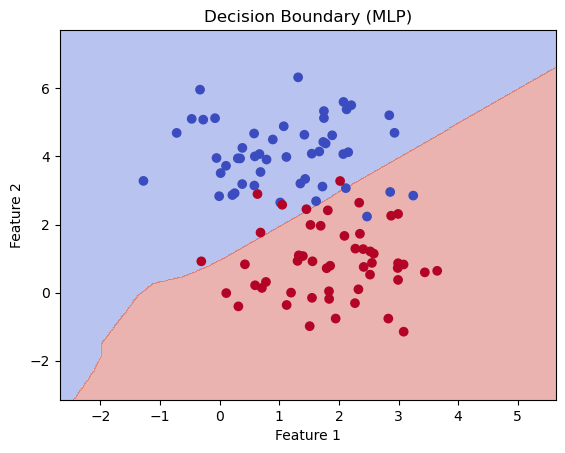

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Generate sample data (2 classes, linearly separable)
X, y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=500)

# Train the model
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test)

# Create a mesh to plot the decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class labels for each point in the mesh
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary (MLP)')
plt.show()


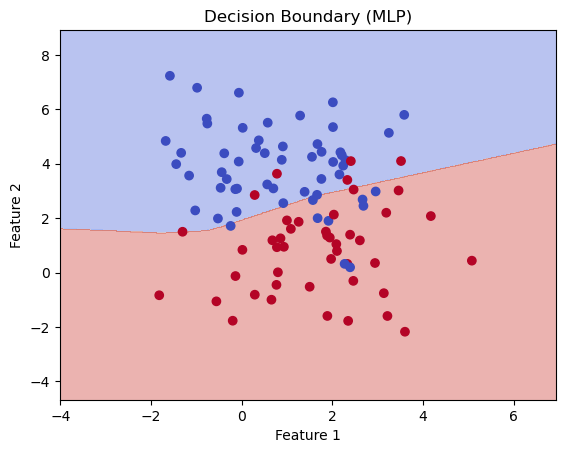

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Generate sample data (2 classes, non-linearly separable)
X, y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=0, cluster_std=1.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the MLP model with two hidden layers
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', max_iter=500)

# Train the model
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test)

# Create a mesh to plot the decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class labels for each point in the mesh
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary (MLP)')
plt.show()


In [ ]:
# Explanation:

# Imports:

# numpy for numerical operations.
# matplotlib.pyplot for plotting.
# sklearn.datasets for generating sample data.
# sklearn.model_selection for splitting data into training and testing sets.
# sklearn.neural_network for the MLP classifier.
# Data Generation:

# make_blobs creates sample data with two clusters (classes) in a two-dimensional space, with some non-linear separability for a more realistic scenario.
# train_test_split separates the data into training and testing sets.
# MLP Definition:

# MLPClassifier defines the MLP model.
# hidden_layer_sizes=(10, 5): Two hidden layers with 10 and 5 neurons, respectively.
# activation='relu': ReLU activation function (commonly used for hidden layers).
# solver='adam': Adam optimization algorithm for efficient training.
# max_iter=500: Maximum number of training iterations.
# Model Training:

# mlp.fit(X_train, y_train) trains the MLP model on the training data.
# Prediction:

# mlp.predict(X_test) predicts class labels for the testing data.
# Decision Boundary Visualization:

# Creates a grid of points using np.meshgrid.
# Predicts class labels for each point in the grid using the trained model.
# Plots the decision boundary using contours (areas with the same predicted class).
# Overlays the original data points with their actual class labels.
# Key Improvements:

# Non-linearly Separable Data: The data generation uses cluster_std=1.5 to create clusters with some overlap, simulating real-world data that might not be perfectly linear.
# Clearer Variable Naming: Descriptive variable names like X_train and y_test enhance readability.
# Concise Comments: Comments focus on key aspects of the code.
# Decision Boundary Plot: The code retains the decision boundary